In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Define the sentiment analysis analyzer
sentiment = SentimentIntensityAnalyzer()

# Read in data

Assumes that the tweet data is already cleaned and preprocessed and in the following form

tweet, sentiment (Negative, Positive, Neutral) (Optional)

In [3]:
#Test using the semeval data set

data_df = pd.read_csv('Datasets/SemevalCleaned/data.csv')
data_df['tweet'] = data_df['tweet'].astype('string')

In [4]:
#Test using Ryan's dataset

#data_df = pd.read_csv("Datasets/TwitterCleaned/dino_tweets_15k.csv")
#data_df = pd.read_csv("Datasets/TwitterCleaned/league_tweets_15k.csv")
#data_df = pd.read_csv("Datasets/TwitterCleaned/musk_tweets_15k.csv")

In [5]:
# Test using combined dataset

#data_df = pd.read_csv("Datasets/TwitterCleaned/data.csv")

In [6]:
# Normalize the sentiment column to use lowercase values
# Turn the column into a category

if 'sentiment' in data_df:
    data_df['sentiment'] = data_df['sentiment'].apply(lambda sentiment: sentiment.lower())
    data_df['sentiment'] = data_df['sentiment'].astype('category')

In [7]:
data_df

,tweet,sentiment
0,"won the match . plus, tomorrow is a very busy ...",neutral
1,some areas of new england could see the first ...,neutral
2,2nd worst qb. definitely tony romo. the man wh...,negative
3,washington - us president barack obama vowed w...,neutral
4,did y'all hear what tony romo dressed up as fo...,neutral
...,...,...
42109,"from what i think you're asking, in no order. ...",neutral
42110,"iran ranks 1st in liver surgeries, allah bless...",positive
42111,hours before he arrived in saudi arabia on tue...,neutral
42112,alex kim kardashian worth how to love kim kard...,negative


# Calculate Polarity Scores

In [8]:
# Get the polarity score of a sentence
def polarity_scores(text):
    # Get the scores
    scores = sentiment.polarity_scores(text)    
    
    return pd.Series(scores)

In [9]:
# Calculate the polarity scores of each tweet
sentiment_df = pd.concat([data_df, data_df['tweet'].apply(polarity_scores)], axis=1)

In [10]:
sentiment_df

,tweet,sentiment,neg,neu,pos,compound
0,"won the match . plus, tomorrow is a very busy ...",neutral,0.000,0.821,0.179,0.5719
1,some areas of new england could see the first ...,neutral,0.000,1.000,0.000,0.0000
2,2nd worst qb. definitely tony romo. the man wh...,negative,0.147,0.576,0.277,0.3818
3,washington - us president barack obama vowed w...,neutral,0.000,1.000,0.000,0.0000
4,did y'all hear what tony romo dressed up as fo...,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
42109,"from what i think you're asking, in no order. ...",neutral,0.109,0.891,0.000,-0.2960
42110,"iran ranks 1st in liver surgeries, allah bless...",positive,0.000,0.763,0.237,0.4215
42111,hours before he arrived in saudi arabia on tue...,neutral,0.109,0.891,0.000,-0.2960
42112,alex kim kardashian worth how to love kim kard...,negative,0.199,0.531,0.270,0.1553


# Label each data item

In [11]:
def complex_label_score(score):
    if score <= 1 and score > 0.75:
        return "Very Positive"
    elif score <= 0.75 and score > 0.35:
        return "Positive"
    elif score <= 0.35 and score > 0.15:
        return "Slightly Positive"
    elif score <= 0.15 and score > 0.05:
        return "Positively Neutral"
    elif score <= 0.05 and score >= -0.05:
        return "Neutral"
    elif score < -0.05 and score >= -0.15:
        return "Negatively Neutral"
    elif score < -0.15 and score >= -0.35:
        return "Slightly Negative"
    elif score < -0.35 and score >= -0.75:
        return "Negative"
    elif score < -0.75 and score >= -1:
        return "Very Negative"
    else:
        return "UNKNOWN SCORE"
    
def simple_label_score(score):
    if score < -0.05:
        return "negative"
    elif score > 0.05:
        return "positive"
    else:
        return "neutral"
    
def no_neutral_label_score(score):
    if score < 0:
        return "negative"
    else:
        return "positive"
    
from pandas.api.types import CategoricalDtype
complex_cat = CategoricalDtype(
    ['Very Negative', 'Negative', 'Slightly Negative', 'Negatively Neutral', 'Neutral', 'Positively Neutral', 'Slightly Positive', 'Positive', 'Very Positive'],
    ordered=True
)

simple_cat = CategoricalDtype(
    ['negative', 'neutral', 'positive'],
    ordered=True
)

no_neutral_cat = CategoricalDtype(
    ['negative', 'positive'],
    ordered=True
)

In [12]:
sentiment_df['simple_score'] = sentiment_df['compound'].apply(simple_label_score).astype(simple_cat)
sentiment_df['complex_score'] = sentiment_df['compound'].apply(complex_label_score).astype(complex_cat)
sentiment_df['no_neutral_score'] = sentiment_df['compound'].apply(no_neutral_label_score).astype(no_neutral_cat)

In [13]:
sentiment_df

,tweet,sentiment,neg,neu,pos,compound,simple_score,complex_score,no_neutral_score
0,"won the match . plus, tomorrow is a very busy ...",neutral,0.000,0.821,0.179,0.5719,positive,Positive,positive
1,some areas of new england could see the first ...,neutral,0.000,1.000,0.000,0.0000,neutral,Neutral,positive
2,2nd worst qb. definitely tony romo. the man wh...,negative,0.147,0.576,0.277,0.3818,positive,Positive,positive
3,washington - us president barack obama vowed w...,neutral,0.000,1.000,0.000,0.0000,neutral,Neutral,positive
4,did y'all hear what tony romo dressed up as fo...,neutral,0.000,1.000,0.000,0.0000,neutral,Neutral,positive
...,...,...,...,...,...,...,...,...,...
42109,"from what i think you're asking, in no order. ...",neutral,0.109,0.891,0.000,-0.2960,negative,Slightly Negative,negative
42110,"iran ranks 1st in liver surgeries, allah bless...",positive,0.000,0.763,0.237,0.4215,positive,Positive,positive
42111,hours before he arrived in saudi arabia on tue...,neutral,0.109,0.891,0.000,-0.2960,negative,Slightly Negative,negative
42112,alex kim kardashian worth how to love kim kard...,negative,0.199,0.531,0.270,0.1553,positive,Slightly Positive,positive


In [14]:
sentiment_df['tweet'][0]

"won the match . plus, tomorrow is a very busy day, with awareness day's and debates. gulp. debates..."

# Plot percentages of each label

<AxesSubplot:title={'center':'No Neutral Label Scores'}, ylabel='no_neutral_score'>

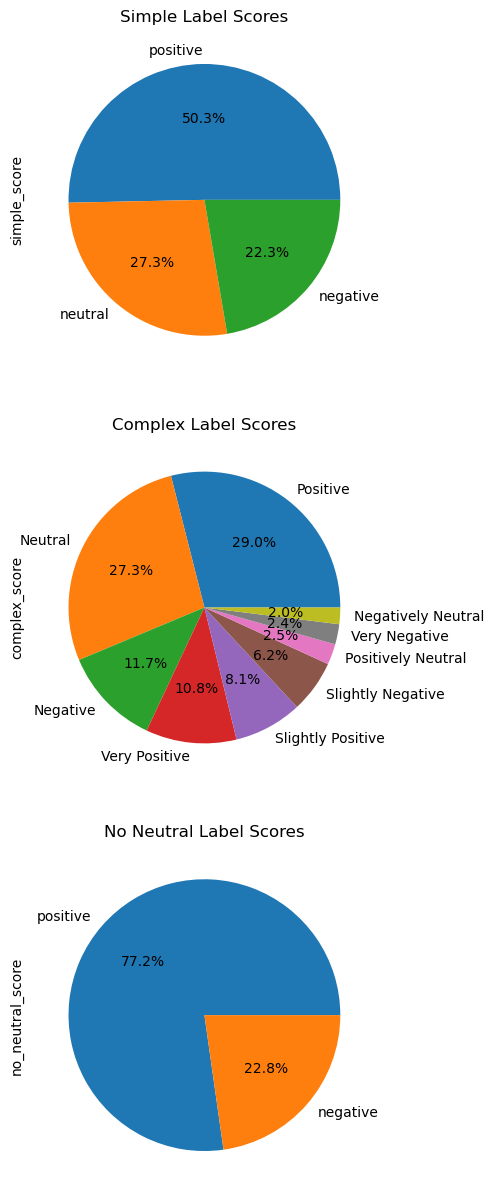

In [15]:
figure, axis = plt.subplots(3, figsize=(15,15))
sentiment_df['simple_score'].value_counts().plot.pie(autopct='%1.1f%%', ax=axis[0], title='Simple Label Scores')
sentiment_df['complex_score'].value_counts().plot.pie(autopct='%1.1f%%', ax=axis[1], title='Complex Label Scores')
sentiment_df['no_neutral_score'].value_counts().plot.pie(autopct='%1.1f%%', ax=axis[2], title='No Neutral Label Scores')

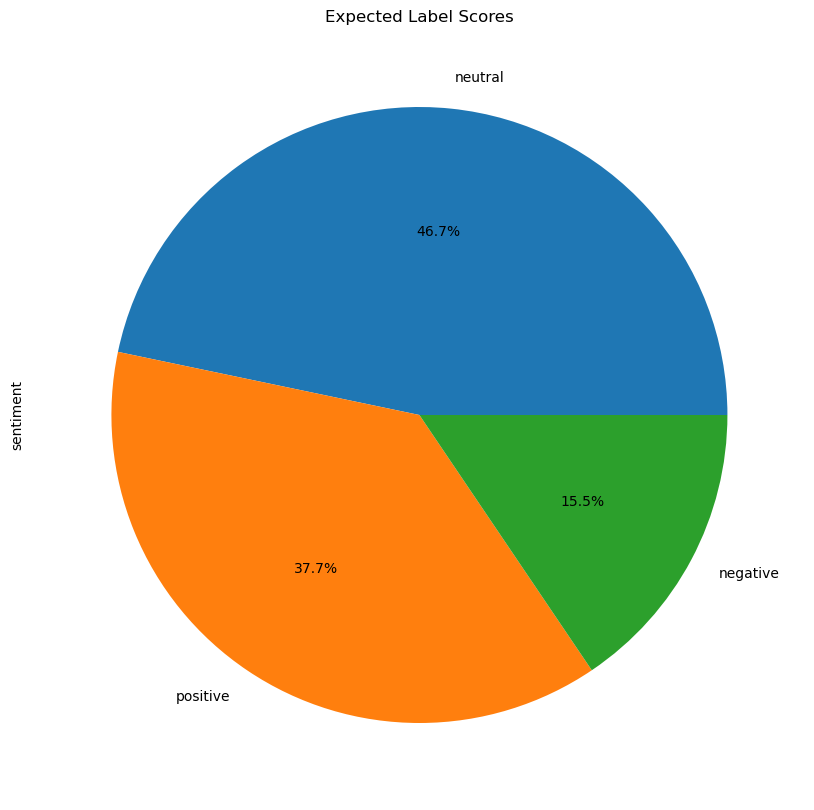

In [16]:
if 'sentiment' in data_df:
    figure, axis = plt.subplots(1, figsize=(10,10))
    data_df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', ax=axis, title='Expected Label Scores')

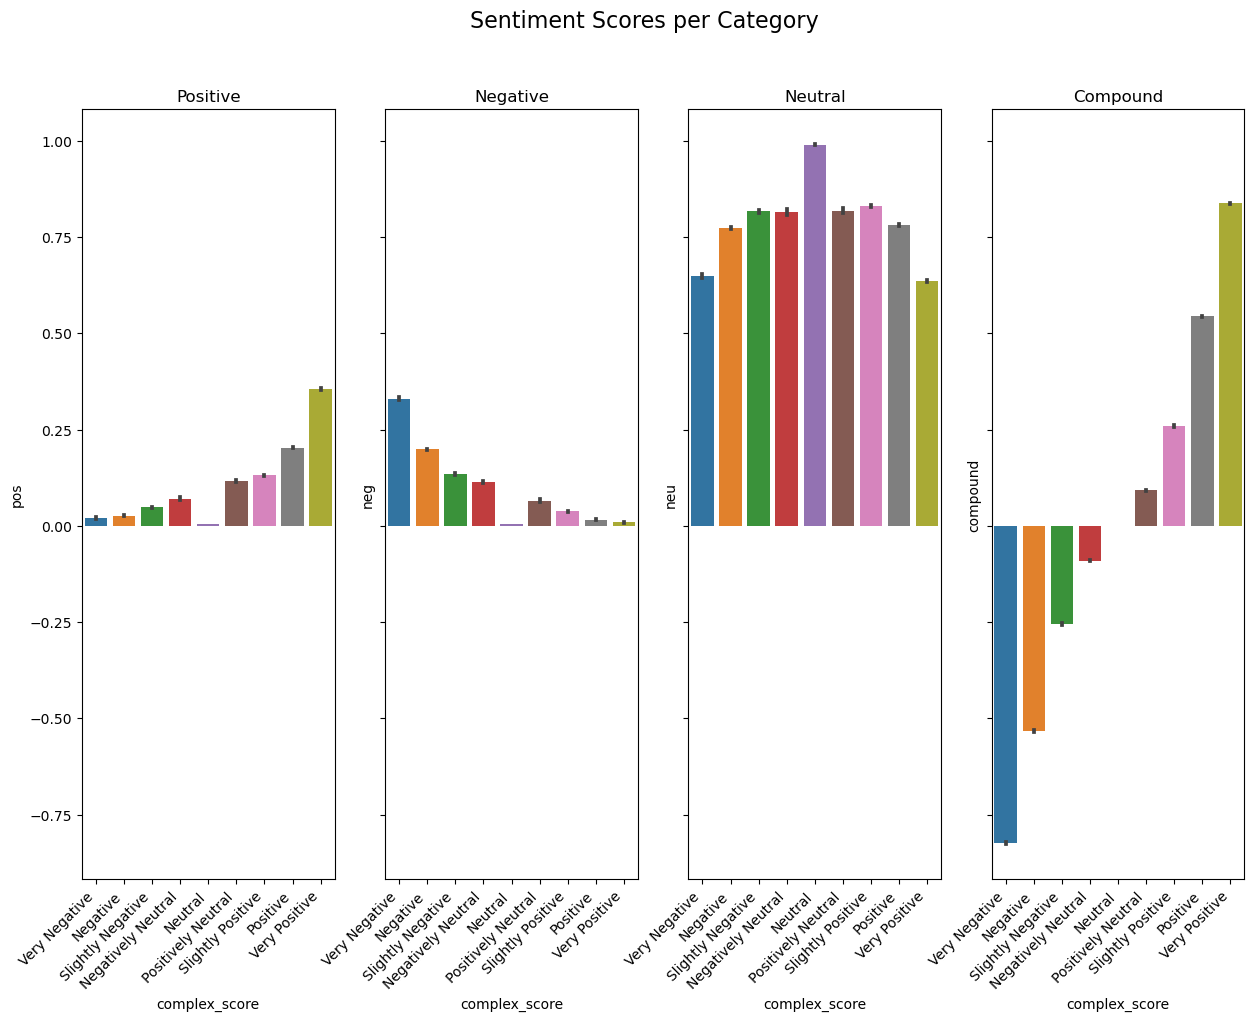

In [17]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(15,10))
sns.barplot(x=sentiment_df['complex_score'], y=sentiment_df['pos'], ax = axes[0])
sns.barplot(x=sentiment_df['complex_score'], y=sentiment_df['neg'], ax = axes[1])
sns.barplot(x=sentiment_df['complex_score'], y=sentiment_df['neu'], ax = axes[2])
sns.barplot(x=sentiment_df['complex_score'], y=sentiment_df['compound'], ax = axes[3])

fig.suptitle('Sentiment Scores per Category', fontsize=16)

axes[0].set_title("Positive")
axes[1].set_title("Negative")
axes[2].set_title("Neutral")
axes[3].set_title("Compound")

for axis in axes:
    for label in axis.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')

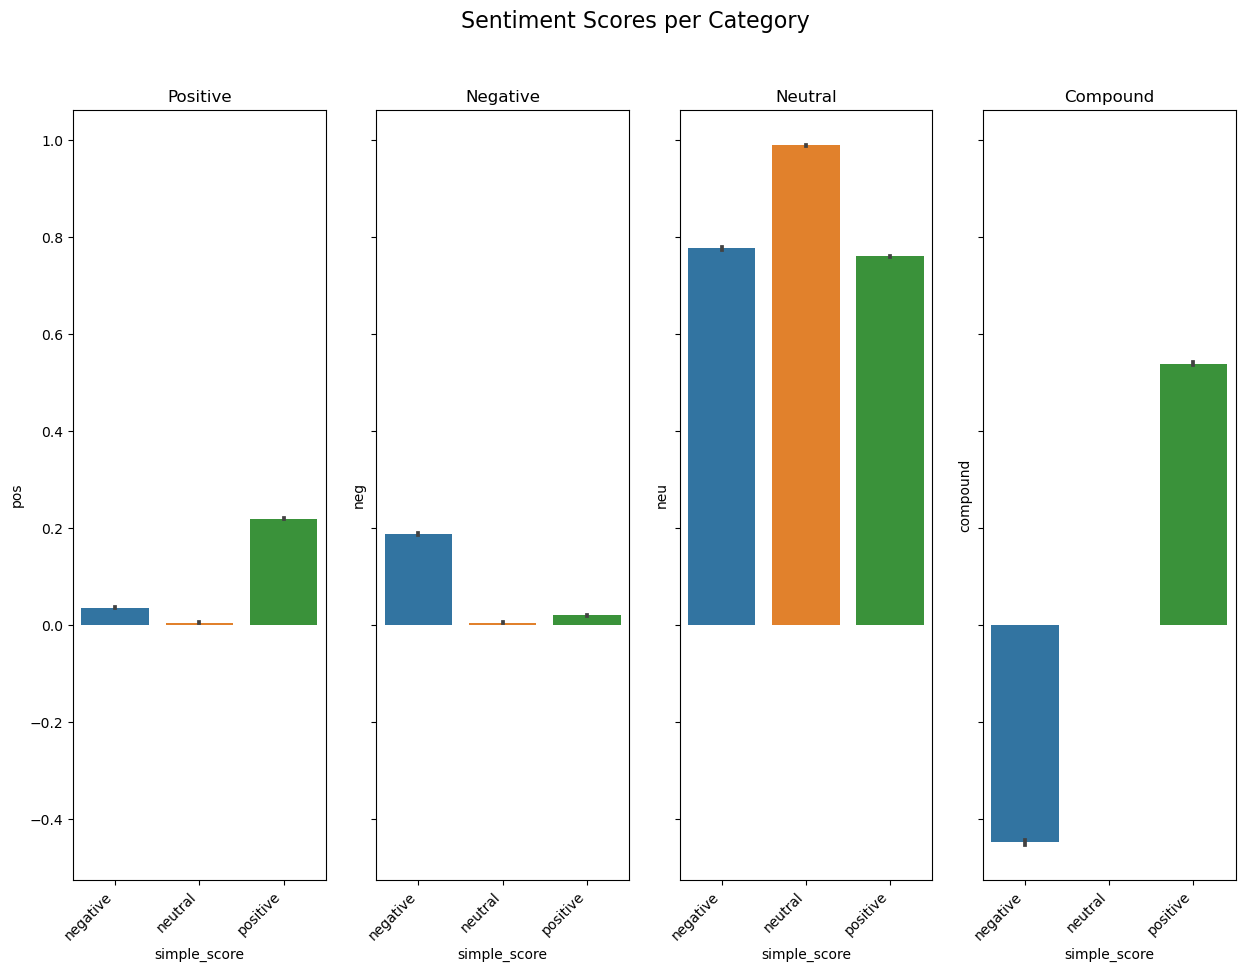

In [18]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(15,10))
sns.barplot(x=sentiment_df['simple_score'], y=sentiment_df['pos'], ax = axes[0])
sns.barplot(x=sentiment_df['simple_score'], y=sentiment_df['neg'], ax = axes[1])
sns.barplot(x=sentiment_df['simple_score'], y=sentiment_df['neu'], ax = axes[2])
sns.barplot(x=sentiment_df['simple_score'], y=sentiment_df['compound'], ax = axes[3])

fig.suptitle('Sentiment Scores per Category', fontsize=16)

axes[0].set_title("Positive")
axes[1].set_title("Negative")
axes[2].set_title("Neutral")
axes[3].set_title("Compound")

for axis in axes:
    for label in axis.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')

# Compare the expected sentiment with calculated sentiment

Accuracy:56.02649950135346%

Classification Report
              precision    recall  f1-score   support

     neutral       0.42      0.61      0.50      6547
    negative       0.68      0.40      0.50     19673
    positive       0.55      0.74      0.63     15894

    accuracy                           0.56     42114
   macro avg       0.55      0.58      0.55     42114
weighted avg       0.59      0.56      0.55     42114



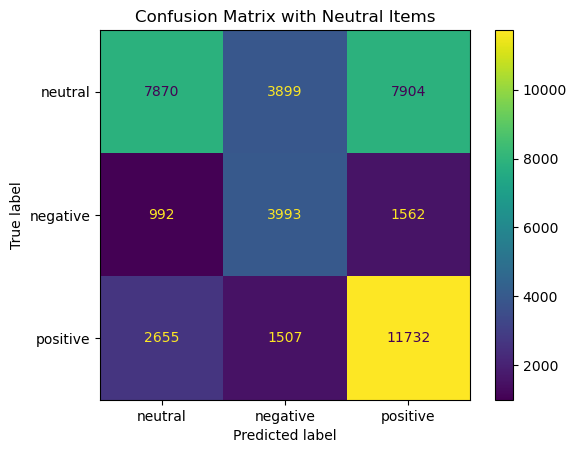

In [19]:
if 'sentiment' in data_df:
    labels = labels=data_df['sentiment'].unique()
    
    # If neutral is in the sentiment, use simple_score, otherwise use no_neutral_score
    if 'neutral' in data_df['sentiment'].unique():
        confusion = confusion_matrix(data_df['sentiment'], sentiment_df['simple_score'], labels=labels)
        accuracy = accuracy_score(data_df['sentiment'], sentiment_df['simple_score'])
        report = classification_report(data_df['sentiment'], sentiment_df['simple_score'], target_names=labels)
        title = 'Confusion Matrix with Neutral Items'
    else:
        confusion = confusion_matrix(data_df['sentiment'], sentiment_df['no_neutral_score'], labels=labels)
        accuracy = accuracy_score(data_df['sentiment'], sentiment_df['no_neutral_score'], labels=labels)
        report = classification_report(data_df['sentiment'], sentiment_df['no_neutral_score'], target_names=labels)
        title = 'Confusion Matrix without Neutral Items'

    print(f"Accuracy:{accuracy * 100}%")
    print()
    print("Classification Report")
    print(report)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=labels)
    disp.plot()
    disp.ax_.set_title(title)